In [ ]:
# Problèmatique traitée: “Peut-on regrouper les entreprises selon leur santé financière et détecter celles qui présentent un risque anormalement élevé ?”

In [ ]:
#1 Biliolithèques settting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

In [ ]:
#2 Chargement de fichier Data 

In [2]:
df = pd.read_excel("Data_09092025.xlsx")

In [6]:
df

,ID,Nom,Activité,Année,Liquidité générale,Liquidité immédiate,Taux de croissance du CA,Marge nette,Var Achats,Var CA&VarStock,REX/CA,IS/CA,RN/ACTIF,Ratio des immobilisations corporelles,Délai moyen de règlement des clients,Délai moyen de règlement des fournisseurs
0,9900223186066,STE ID 09900223186066,Activité 5,2022,3.61,2.11,-0.069,0.015,-0.0818,-0.0694,0.037,0.008,0.022,0.0055,118,62
1,9900223186066,STE ID 09900223186066,Activité 5,2024,5.66,3.86,-0.067,0.015,-0.0689,-0.0674,0.026,0.006,0.024,0.0222,98,29
2,9900223186066,STE ID 09900223186066,Activité 5,2021,5.11,3.50,0.009,0.013,0.0587,0.0094,0.036,0.008,0.018,0.0050,154,46
3,9900223186066,STE ID 09900223186066,Activité 5,2020,4.42,3.05,0.083,0.030,0.0535,0.0834,0.061,0.014,0.049,0.0052,124,38
4,9900223186066,STE ID 09900223186066,Activité 5,2023,3.41,2.52,0.319,0.011,0.3560,0.3188,0.033,0.006,0.021,0.0059,104,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,99990226581981,STE ID 99990226581981,Activité 2,2022,2.30,2.28,-0.188,-7.004,-0.6864,-0.1876,-655.347,0.625,-0.001,0.0505,2008,28471
4250,99990226581981,STE ID 99990226581981,Activité 2,2023,2.04,2.03,-0.007,-16.805,3.6149,-0.0075,-728.239,1.017,-0.001,0.0505,2024,38194
4251,99990226581981,STE ID 99990226581981,Activité 2,2024,2.67,2.65,0.008,-37.986,0.3067,0.0083,-784.084,1.138,-0.003,0.0501,2007,42399
4252,99990226581981,STE ID 99990226581981,Activité 2,2020,2.72,2.68,0.022,-3.903,-0.5109,0.0218,-648.266,0.919,0.000,0.0528,2013,28463


In [7]:
# Afficher les 5 premières lignes
print(df.head())

              ID                    Nom    Activité  Année  \
0  9900223186066  STE ID 09900223186066  Activité 5   2022   
1  9900223186066  STE ID 09900223186066  Activité 5   2024   
2  9900223186066  STE ID 09900223186066  Activité 5   2021   
3  9900223186066  STE ID 09900223186066  Activité 5   2020   
4  9900223186066  STE ID 09900223186066  Activité 5   2023   

   Liquidité générale  Liquidité immédiate  Taux de croissance du CA  \
0                3.61                 2.11                    -0.069   
1                5.66                 3.86                    -0.067   
2                5.11                 3.50                     0.009   
3                4.42                 3.05                     0.083   
4                3.41                 2.52                     0.319   

   Marge nette  Var Achats  Var CA&VarStock  REX/CA  IS/CA  RN/ACTIF  \
0        0.015     -0.0818          -0.0694   0.037  0.008     0.022   
1        0.015     -0.0689          -0.0674   0.02

In [5]:
# Nombre de lignes et colonnes
print("Dimensions du DataFrame :", df.shape)


Dimensions du DataFrame : (4254, 16)


In [6]:
# Liste des colonnes
print("Colonnes disponibles :", df.columns.tolist())

Colonnes disponibles : ['ID', 'Nom', 'Activité', 'Année', 'Liquidité générale', 'Liquidité immédiate', 'Taux de croissance du CA', 'Marge nette', 'Var Achats', 'Var CA&VarStock', 'REX/CA', 'IS/CA', 'RN/ACTIF', 'Ratio des immobilisations corporelles', 'Délai moyen de règlement des clients', 'Délai moyen de règlement des fournisseurs']


In [ ]:
# PARTIE A - ANALYSE EXPLORATOIRE (EDA)

In [7]:
#3. Types de données
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4254 entries, 0 to 4253
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         4254 non-null   int64  
 1   Nom                                        4254 non-null   object 
 2   Activité                                   4254 non-null   object 
 3   Année                                      4254 non-null   int64  
 4   Liquidité générale                         4241 non-null   float64
 5   Liquidité immédiate                        4242 non-null   float64
 6   Taux de croissance du CA                   4056 non-null   float64
 7   Marge nette                                4088 non-null   float64
 8   Var Achats                                 4193 non-null   float64
 9   Var CA&VarStock                            4136 non-null   float64
 10  REX/CA                  

In [10]:
#4. Vérification valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
ID                                             0
Nom                                            0
Activité                                       0
Année                                          0
Liquidité générale                            13
Liquidité immédiate                           12
Taux de croissance du CA                     198
Marge nette                                  166
Var Achats                                    61
Var CA&VarStock                              118
REX/CA                                       161
IS/CA                                        205
RN/ACTIF                                      11
Ratio des immobilisations corporelles         90
Délai moyen de règlement des clients           0
Délai moyen de règlement des fournisseurs      0
dtype: int64


In [7]:
#5 Sélection colonnes numériques
num_cols = df.select_dtypes(include=['int64','float64']).columns
print("Colonnes numériques:", list(num_cols))

Colonnes numériques: ['ID', 'Année', 'Liquidité générale', 'Liquidité immédiate', 'Taux de croissance du CA', 'Marge nette', 'Var Achats', 'Var CA&VarStock', 'REX/CA', 'IS/CA', 'RN/ACTIF', 'Ratio des immobilisations corporelles', 'Délai moyen de règlement des clients', 'Délai moyen de règlement des fournisseurs']


In [8]:
#6 Remplacer NaN(NonNull) par 0 pour colonnes numériques 
df[num_cols] = df[num_cols].fillna(0)


In [8]:
#Vérification des valeurs NaN remplacées
print(df.isnull().sum())

ID                                             0
Nom                                            0
Activité                                       0
Année                                          0
Liquidité générale                            13
Liquidité immédiate                           12
Taux de croissance du CA                     198
Marge nette                                  166
Var Achats                                    61
Var CA&VarStock                              118
REX/CA                                       161
IS/CA                                        205
RN/ACTIF                                      11
Ratio des immobilisations corporelles         90
Délai moyen de règlement des clients           0
Délai moyen de règlement des fournisseurs      0
dtype: int64


In [9]:
# 7. Vérification doublons
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


In [9]:
#Identification des données aberrantes avec la fonction IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Trouver les outliers pour la colonne 'PRICE'
outliers = detect_outliers_iqr(df, 'Marge nette')

# Afficher les outliers
print("Outliers détectés:")
print(outliers)

Outliers détectés:
                  ID                    Nom    Activité  Année  \
15     9901223384014  STE ID 09901223384014  Activité 4   2020   
16     9901223384014  STE ID 09901223384014  Activité 4   2023   
17     9901223384014  STE ID 09901223384014  Activité 4   2022   
18     9901223384014  STE ID 09901223384014  Activité 4   2021   
19     9901223384014  STE ID 09901223384014  Activité 4   2024   
...              ...                    ...         ...    ...   
4249  99990226581981  STE ID 99990226581981  Activité 2   2022   
4250  99990226581981  STE ID 99990226581981  Activité 2   2023   
4251  99990226581981  STE ID 99990226581981  Activité 2   2024   
4252  99990226581981  STE ID 99990226581981  Activité 2   2020   
4253  99990226581981  STE ID 99990226581981  Activité 2   2021   

      Liquidité générale  Liquidité immédiate  Taux de croissance du CA  \
15                  0.97                 0.10                    -0.743   
16                  0.94              

In [11]:
# ====================================================================
# PHASE 1.1 : ANALYSE DE LA QUALITÉ DES DONNÉES
# ====================================================================

print("\n" + "="*80)
print("🔍 PHASE 1.1 : ANALYSE DE LA QUALITÉ DES DONNÉES")
print("="*80)

# 1. Analyse des valeurs manquantes détaillée
print("\n📋 ANALYSE DES VALEURS MANQUANTES:")
missing_analysis = pd.DataFrame({
    'Variable': df.columns,
    'Valeurs_manquantes': df.isnull().sum(),
    'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Type': df.dtypes
})
missing_analysis = missing_analysis[missing_analysis['Valeurs_manquantes'] > 0].sort_values('Pourcentage', ascending=False)
print(missing_analysis)

# 2. Détection des valeurs aberrantes
print("\n🎯 DÉTECTION DES VALEURS ABERRANTES:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['ID', 'Année']]

outliers_summary = []
for col in numeric_cols:
    if df[col].notna().sum() > 0:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outliers_summary.append({
            'Variable': col,
            'Nombre_aberrantes': len(outliers),
            'Pourcentage': (len(outliers) / df[col].notna().sum() * 100).round(2),
            'Min': df[col].min(),
            'Max': df[col].max(),
            'Q1': Q1,
            'Q3': Q3
        })

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df.sort_values('Pourcentage', ascending=False))

# 3. Analyse des entreprises avec données complètes
complete_companies = df.groupby('ID').apply(lambda x: x.isnull().sum().sum()).reset_index(name='missing_values')
complete_companies_count = (complete_companies['missing_values'] == 0).sum()
print(f"\n📈 ENTREPRISES AVEC DONNÉES COMPLÈTES: {complete_companies_count}/{df['ID'].nunique()} ({complete_companies_count/df['ID'].nunique()*100:.1f}%)")


🔍 PHASE 1.1 : ANALYSE DE LA QUALITÉ DES DONNÉES

📋 ANALYSE DES VALEURS MANQUANTES:
                                                                    Variable  \
IS/CA                                                                  IS/CA   
Taux de croissance du CA                            Taux de croissance du CA   
Marge nette                                                      Marge nette   
REX/CA                                                                REX/CA   
Var CA&VarStock                                              Var CA&VarStock   
Ratio des immobilisations corporelles  Ratio des immobilisations corporelles   
Var Achats                                                        Var Achats   
Liquidité générale                                        Liquidité générale   
Liquidité immédiate                                      Liquidité immédiate   
RN/ACTIF                                                            RN/ACTIF   

                                   

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_9432\2944283938.py:49: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  complete_companies = df.groupby('ID').apply(lambda x: x.isnull().sum().sum()).reset_index(name='missing_values')


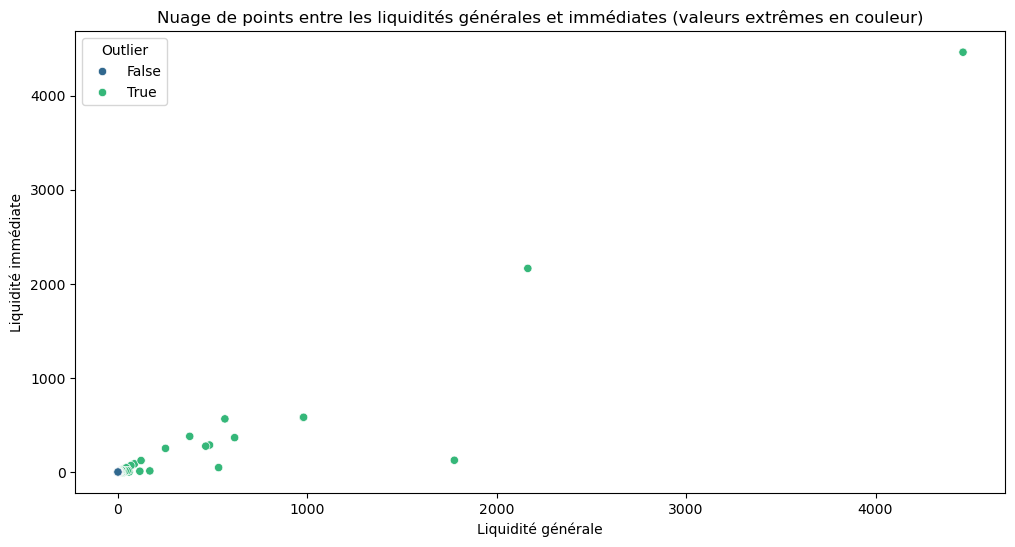

In [22]:
# Identification des outliers par la visualisation des nuages des points 
#Détecter les outliers pour les colonnes 'Liquidité générale' et 'Liquidité immédiate'
outliers_liquidite_generale = detect_outliers_iqr(df, 'Liquidité générale')
outliers_liquidite_immediate = detect_outliers_iqr(df, 'Liquidité immédiate')

# Ajouter une colonne pour indiquer si la valeur est extrême
df['Outlier'] = False
df.loc[outliers_liquidite_generale.index, 'Outlier'] = True
df.loc[outliers_liquidite_immediate.index, 'Outlier'] = True

# Créer un nuage de points avec Seaborn en mettant en évidence les valeurs extrêmes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Liquidité générale', y='Liquidité immédiate', hue='Outlier', palette='viridis')
plt.xlabel('Liquidité générale')
plt.ylabel('Liquidité immédiate')
plt.title("Nuage de points entre les liquidités générales et immédiates (valeurs extrêmes en couleur)")
plt.show()


In [7]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Sélectionner uniquement les colonnes numériques
df_num = df.select_dtypes(include=['number'])

# Appliquer l'Isolation Forest uniquement sur les colonnes numériques
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_num)

# Ajouter les labels d'anomalie au DataFrame original
df['Outlier'] = outlier_labels

# Afficher les outliers
outliers = df[df['Outlier'] == -1]
print("Outliers détectés :")
print(outliers)


Outliers détectés :
                  ID                    Nom    Activité  Année  \
18     9901223384014  STE ID 09901223384014  Activité 4   2021   
19     9901223384014  STE ID 09901223384014  Activité 4   2024   
46     9902226983013  STE ID 09902226983013  Activité 5   2023   
74     9905223383003  STE ID 09905223383003  Activité 2   2021   
75     9905223383003  STE ID 09905223383003  Activité 2   2020   
...              ...                    ...         ...    ...   
4249  99990226581981  STE ID 99990226581981  Activité 2   2022   
4250  99990226581981  STE ID 99990226581981  Activité 2   2023   
4251  99990226581981  STE ID 99990226581981  Activité 2   2024   
4252  99990226581981  STE ID 99990226581981  Activité 2   2020   
4253  99990226581981  STE ID 99990226581981  Activité 2   2021   

      Liquidité générale  Liquidité immédiate  Taux de croissance du CA  \
18                  1.06                 0.09                     2.495   
19                  1.40             

In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Sélectionner uniquement les colonnes numériques
df_num = df.select_dtypes(include=['number'])

# Appliquer l'Isolation Forest uniquement sur les colonnes numériques
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df_num)

# Ajouter les labels d'anomalie au DataFrame original
df['Outlier'] = outlier_labels

# Afficher les outliers
outliers = df[df['Outlier'] == -1]
print("Outliers détectés :")
print(outliers)


NameError: name 'df' is not defined

In [12]:
#6 Statistiques de base (moyenne, min, max…)
print('Résumé Statistiques')
print(df.describe())

Résumé Statistiques
                 ID        Année  Liquidité générale  Liquidité immédiate  \
count  4.254000e+03  4254.000000         4241.000000          4242.000000   
mean   5.469138e+13  2021.980254            5.729149             4.080587   
std    2.897099e+13     1.408912           85.994788            78.499753   
min    9.900223e+12  2020.000000            0.000000            -0.240000   
25%    2.992022e+13  2021.000000            0.990000             0.570000   
50%    4.997922e+13  2022.000000            1.530000             1.040000   
75%    7.992222e+13  2023.000000            2.390000             1.640000   
max    9.999023e+13  2024.000000         4461.460000          4461.460000   

       Taux de croissance du CA  Marge nette    Var Achats  Var CA&VarStock  \
count               4056.000000  4088.000000   4193.000000      4136.000000   
mean                   0.428302    -3.021684     28.493768         0.575643   
std                    5.507418    93.848160   11

In [ ]:
# 6. Visualisation distributions des principales variables

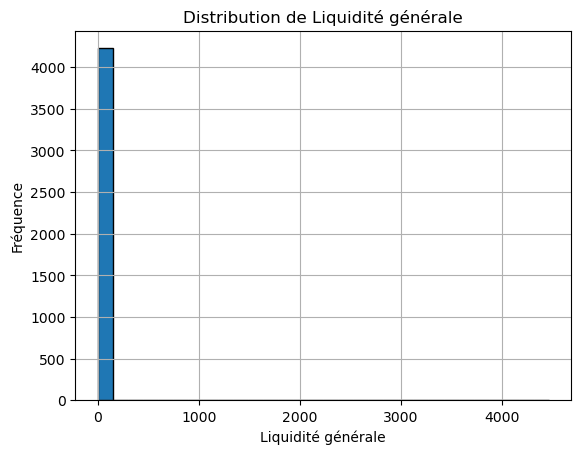

In [13]:
# Histogramme de la liquidité
df["Liquidité générale"].hist(bins=30, edgecolor="black")
plt.title("Distribution de Liquidité générale")
plt.xlabel("Liquidité générale")
plt.ylabel("Fréquence")
plt.show()

In [8]:
#1 Histogramme Marge nette moyenne par

Activité
Activité 3     0.080857
Activité 5    -0.042455
Activité 1    -1.691137
Activité 4    -2.935055
Activité 2    -3.464555
Activité 6   -10.145288
Name: Marge nette, dtype: float64


<Axes: title={'center': 'Marge nette moyenne par activité'}, xlabel='Activité'>

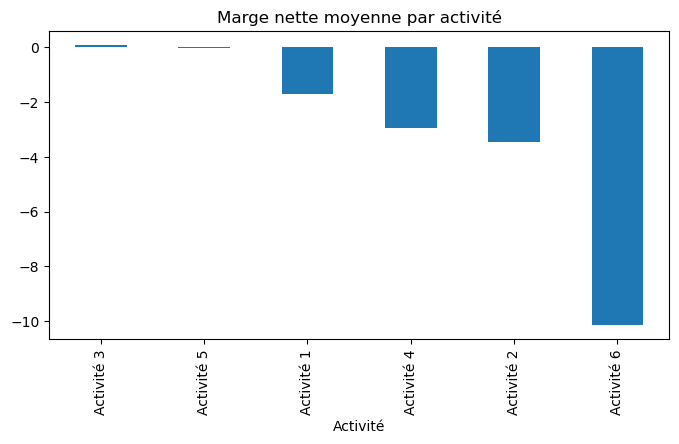

In [37]:
#2 Rentabilité Moyenne par secteur d'activité
marge_par_activite = df.groupby("Activité")["Marge nette"].mean().sort_values(ascending=False)
print(marge_par_activite)
marge_par_activite.plot(kind="bar", figsize=(8,4), title="Marge nette moyenne par activité")


In [42]:
#3 Top 10 entreprises avec meilleure rentabilité (RN/ACTIF)
top_rentables = df.sort_values(by="RN/ACTIF", ascending=False).head(10)
print("Top 10 entreprises les plus rentables :")
print(top_rentables[["ID","Nom","Année","RN/ACTIF"]])

Top 10 entreprises les plus rentables :
                  ID                    Nom  Année  RN/ACTIF
4128  99944221482992  STE ID 99944221482992   2023     0.697
4127  99944221482992  STE ID 99944221482992   2020     0.697
4130  99944221482992  STE ID 99944221482992   2021     0.651
1711  39982223381371  STE ID 39982223381371   2022     0.619
191    9921221689049  STE ID 09921221689049   2024     0.543
4131  99944221482992  STE ID 99944221482992   2022     0.538
1710  39982223381371  STE ID 39982223381371   2021     0.525
2757  69933223380620  STE ID 69933223380620   2021     0.462
1709  39982223381371  STE ID 39982223381371   2020     0.437
1708  39982223381371  STE ID 39982223381371   2024     0.414


In [28]:
#Fonction de classification
def classer_liquidite_generale(lg):
    if lg < 1:
        return "Faible liquidité (risque de difficultés)"
    elif 1 <= lg <= 1.5:
        return "Liquidité acceptable"
    else:  # lg > 1.5
        return "Bonne liquidité"


In [31]:
df["Type_LG"].value_counts()



Type_LG
Liquidité acceptable    1771
Excellente liquidité    1409
Faible liquidité        1074
Name: count, dtype: int64

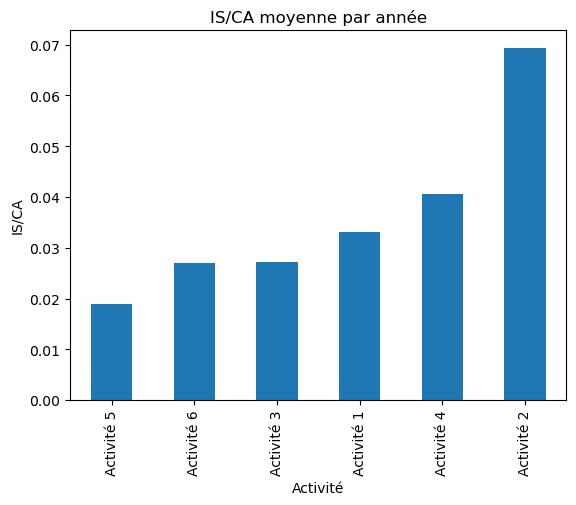

In [15]:
#4 la quote part de IS/CA par Année
df.groupby("Activité")["IS/CA"].mean().sort_values().plot(kind="bar")
plt.title("IS/CA moyenne par année")
plt.ylabel("IS/CA")
plt.show()

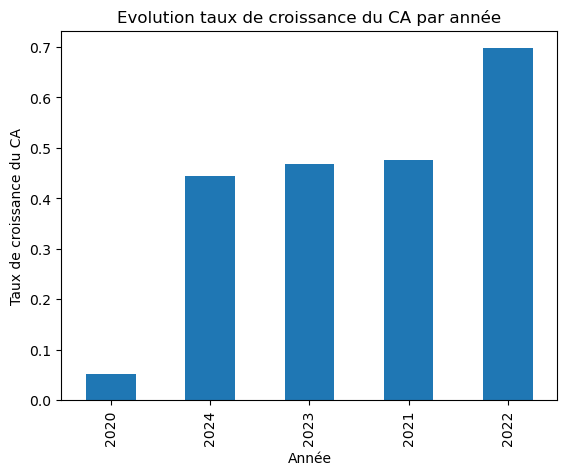

In [21]:
#5 L'évolution des Taux de croissance du CA par année
df.groupby("Année")["Taux de croissance du CA"].mean().sort_values().plot(kind="bar")
plt.title("Evolution taux de croissance du CA par année")
plt.ylabel("Taux de croissance du CA")
plt.show()

In [ ]:
Partie B: Visualisation avancée avec Boxplots

In [ ]:
# Corrélations entre indicateurs

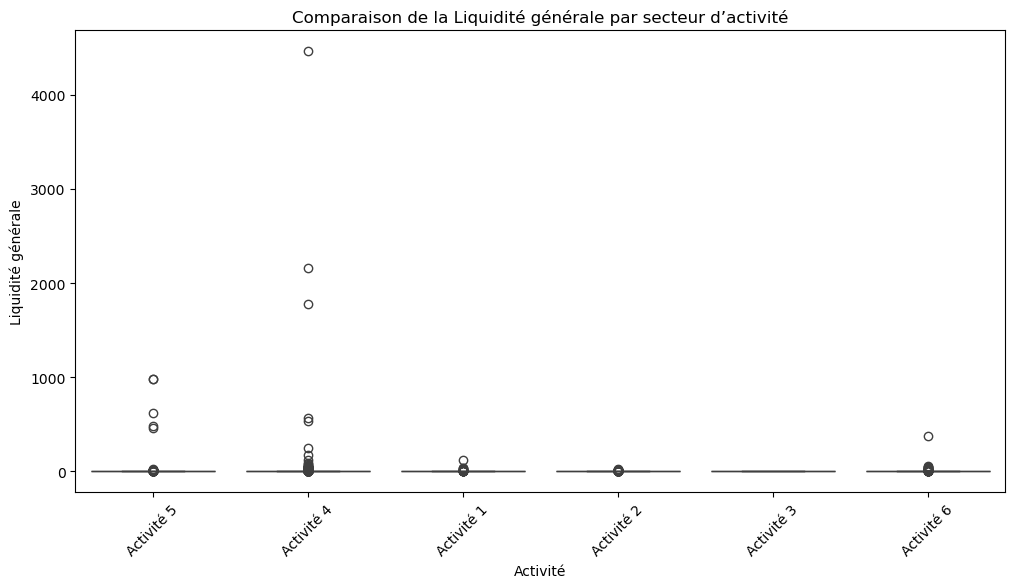

In [14]:
# 2 Comparaison par secteur d’activité
plt.figure(figsize=(12,6))
sns.boxplot(x="Activité", y="Liquidité générale", data=df)
plt.title("Comparaison de la Liquidité générale par secteur d’activité")
plt.xticks(rotation=45)
plt.show()


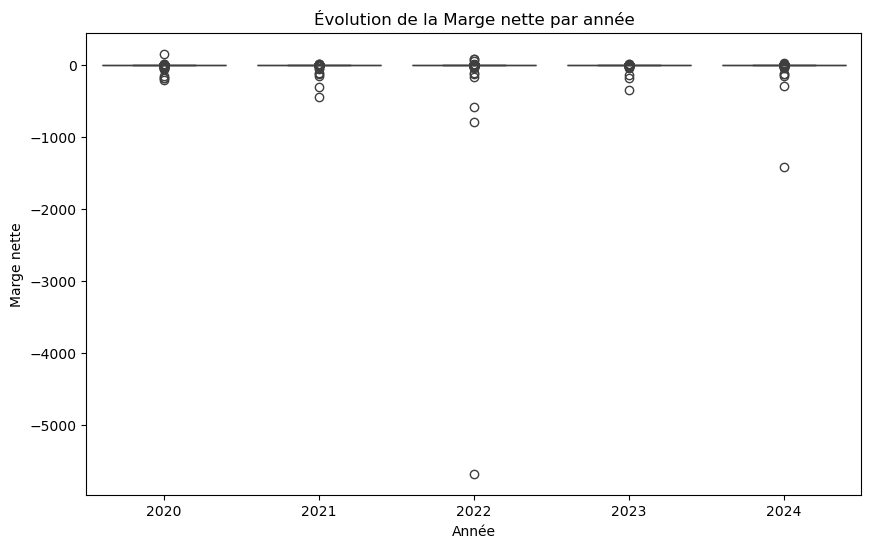

In [18]:
# 3 Comparaison par année
plt.figure(figsize=(10,6))
sns.boxplot(x="Année", y="Marge nette", data=df)
plt.title("Évolution de la Marge nette par année")
plt.show()


In [28]:
#4 Top 20 entreprises avec meilleure rentabilité (RN/ACTIF)
top_rentables = df.sort_values(by="RN/ACTIF", ascending=False).head(20)
print("Top 20 entreprises les plus rentables :")
print(top_rentables[["ID","Nom","Année","RN/ACTIF"]])

Top 20 entreprises les plus rentables :
                  ID                    Nom  Année  RN/ACTIF
4128  99944221482992  STE ID 99944221482992   2023     0.697
4127  99944221482992  STE ID 99944221482992   2020     0.697
4130  99944221482992  STE ID 99944221482992   2021     0.651
1711  39982223381371  STE ID 39982223381371   2022     0.619
191    9921221689049  STE ID 09921221689049   2024     0.543
4131  99944221482992  STE ID 99944221482992   2022     0.538
1710  39982223381371  STE ID 39982223381371   2021     0.525
2757  69933223380620  STE ID 69933223380620   2021     0.462
1709  39982223381371  STE ID 39982223381371   2020     0.437
1708  39982223381371  STE ID 39982223381371   2024     0.414
3109  79912221189709  STE ID 79912221189709   2021     0.400
1707  39982223381371  STE ID 39982223381371   2023     0.373
2539  59985221082502  STE ID 59985221082502   2023     0.370
4149  99948221486984  STE ID 99948221486984   2024     0.369
221    9928224083044  STE ID 09928224083044  

In [ ]:
#5 Corrélation liquidité générale et liquidité immédiate

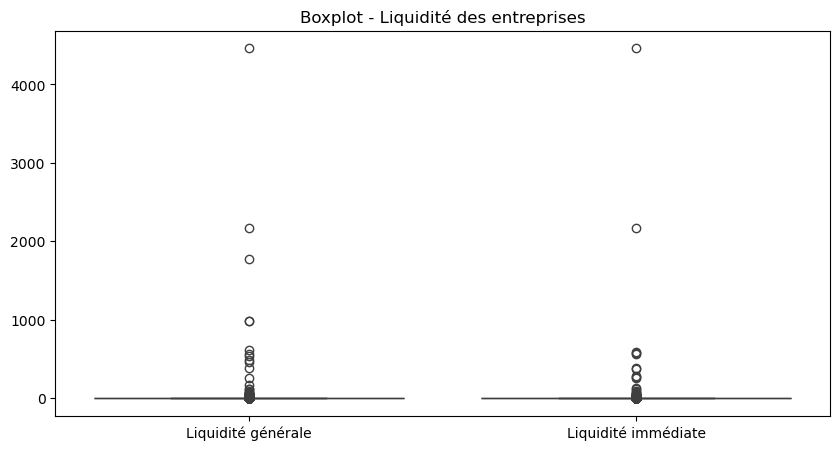

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df[["Liquidité générale", "Liquidité immédiate"]])
plt.title("Boxplot - Liquidité des entreprises")
plt.show()


In [ ]:
#6 la variable de classement des entreprises par seuil de liquidité générale avec Numpy

In [42]:
import pandas as pd
import numpy as np

# 1. Conversion en numérique (invalides -> NaN) déjà fait en EDA 
df["Liquidité générale"] = pd.to_numeric(df["Liquidité générale"], errors="coerce")

# 2. Définition des bornes et labels
bins = [-np.inf, 1.0, 1.5, np.inf]
labels = [
    "Faible liquidité (risque de difficultés)",
    "Liquidité acceptable",
    "Bonne liquidité"
]

# 3. Créetion de la colonne Type liquidité générale (Type_LG)
df["Type_LG"] = pd.cut(df["Liquidité générale"], bins=bins, labels=labels, right=True)

# 4. Remplacement NaN par "Inconnu"
df["Type_LG"] = df["Type_LG"].cat.add_categories(["Inconnu"]).fillna("Inconnu")

# 5. Vérification de résultat
print(df["Type_LG"].value_counts(dropna=False))



Type_LG
Bonne liquidité                             2159
Faible liquidité (risque de difficultés)    1105
Liquidité acceptable                         990
Inconnu                                        0
Name: count, dtype: int64


In [ ]:
#7 Visualisation de la distribution de liquidité générale

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
#6 Visualisation de la variable liquidité générale selon le critères de seuil
# Étape 1 : Classification avec conditions des seuils
def classer_liquidite_generale(val):
    if pd.isna(val):
        return "Inconnu"
    elif val < 1:
        return "Faible"
    elif 1 <= val <= 1.5:
        return "Acceptable"
    elif val > 1.5:
        return "Bonne"

df["Type_LG"] = df["Liquidité générale"].apply(classer_liquidite_generale)


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_5172\796713140.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


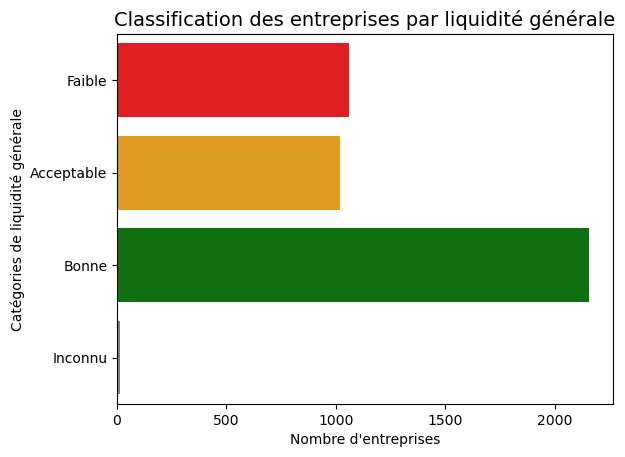

In [22]:

# Étape 2 : visualisation de la variable avec seaborn et matplotlib
couleurs = {
    "Faible": "red",
    "Acceptable": "orange",
    "Bonne": "green",
    "Inconnu": "grey"
}

sns.countplot(
    y="Type_LG",
    data=df,
    order=["Faible", "Acceptable", "Bonne", "Inconnu"],
    palette=couleurs
)

plt.title("Classification des entreprises par liquidité générale", fontsize=14)
plt.xlabel("Nombre d'entreprises")
plt.ylabel("Catégories de liquidité générale")
plt.show()

In [ ]:
### Interprétation
La répartition des entreprises selon leur liquidité générale montre que :
- Celles avec une liquidité **<1** sont en difficulté : elles n’ont pas assez d’actifs circulants pour couvrir leurs dettes à court terme.
- La zone **1 – 1.5** traduit une liquidité acceptable, mais qui demande une vigilance particulière.
- Une liquidité **>1.5** correspond à une situation saine et rassurante pour les créanciers.

La majorité des entreprises se situent dans une situation de liquidités


In [18]:
#7 Analyse de la liquidité générale moyenne par activité
df.groupby("Activité")["Liquidité générale"].median().sort_values()


Activité
Activité 2    1.210
Activité 3    1.330
Activité 1    1.465
Activité 4    1.490
Activité 5    1.660
Activité 6    1.760
Name: Liquidité générale, dtype: float64

In [ ]:
##Interpretation: 
Apès comparaison des secteurs dactivité par leurs liquidités moyenne, il convient de retenir que l activité 6 se positionne en premier
avec une liquidité générale moyenne de 1.760 avec une légére différence de l activité 5 se positionnant en deuxiéme.

In [36]:
#8 Fonction de classification des entreprise selon le critères de la liquidité immédiate
def classer_liquidite_immediate(li):
    if pd.isna(li):
        return "Inconnu"
    try:
        li = float(li)
    except:
        return "Inconnu"
    if li < 0.2:
        return "Insuffisance de trésorerie immédiate (risque)"
    elif 0.2 <= li <= 0.5:
        return "Liquidité immédiate modérée (prudence requise)"
    else:
        return "Bonne liquidité immédiate (situation solide)"

df["Type_LI"] = df["Liquidité immédiate"].apply(classer_liquidite_immediate)

print(df["Type_LI"].value_counts())


Type_LI
Bonne liquidité immédiate (situation solide)      3328
Liquidité immédiate modérée (prudence requise)     613
Insuffisance de trésorerie immédiate (risque)      313
Name: count, dtype: int64


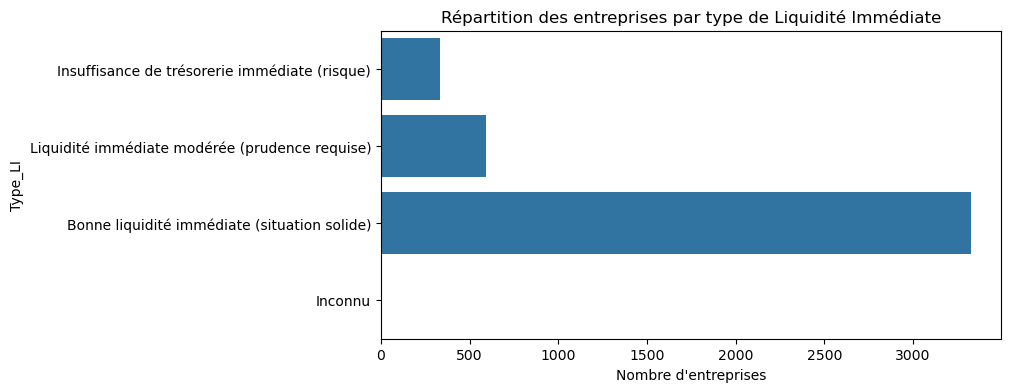

In [39]:
#8 Visualisation des entreprises par seuils de de liquidité immédiate
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(y="Type_LI", data=df, order=labels_li + ["Inconnu"])
plt.title("Répartition des entreprises par type de Liquidité Immédiate")
plt.xlabel("Nombre d'entreprises")
plt.show()


In [ ]:
### Interprétation
On observe que :
- 313 entreprises avec un ratio **<0.2** présentent une insuffisance de trésorerie immédiate, ce qui reflète un risque de tension de trésorerie.
- 613 entreprises dans la catégorie **0.2 – 0.5** traduit une liquidité modérée, nécessitant une gestion prudente.
- 3328 entreprises au-dessus de **0.5**, les entreprises ont une bonne trésorerie pour faire face à leurs dettes à court terme.

Cela permet d’évaluer la capacité financière face aux imprévus.

In [ ]:
#9 Classification des entreprises selon leur marge opérationnelle (REX/CA)

In [23]:
#Etape 1: Définition fonction de classification
def classer_rexca(val):
    if pd.isna(val):
        return "Inconnu"
    elif val > 15:
        return "Excellente performance"
    elif val >= 5:
        return "Performance acceptable"
    else:
        return "Faible performance"


In [24]:
#Etape 2: Création d'une nouvelle colonne Type_REXCA
df["Type_REXCA"] = df["REX/CA"].apply(classer_rexca)


In [25]:
#Etape 3: Classification des entreprise par seuils de performance
print(df["Type_REXCA"].value_counts())
#" La valeur Inconnu corresponds aux nombres d'entreprises qui n'ont pas renseignés les données de leur marges opératonnelles"

Type_REXCA
Faible performance        4088
Inconnu                    161
Excellente performance       4
Performance acceptable       1
Name: count, dtype: int64


C:\Users\Administrateur\AppData\Local\Temp\ipykernel_5172\827471091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Type_REXCA", data=df,


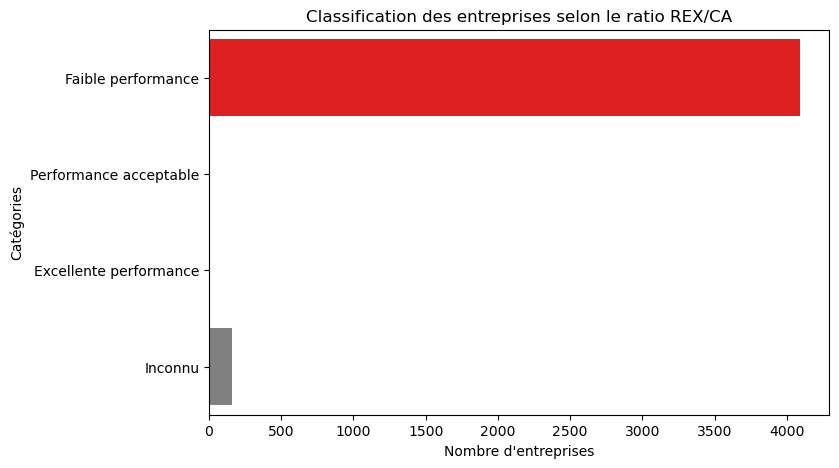

In [37]:
#Etape 3: Visualisation de la variable rentabilité opérationnelle avec seaborn et matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(y="Type_REXCA", data=df,
              order=["Faible performance", "Performance acceptable", "Excellente performance", "Inconnu"],
              palette={"Faible performance":"red", "Performance acceptable":"orange", "Excellente performance":"green", "Inconnu":"gray"})
plt.title("Classification des entreprises selon le ratio REX/CA")
plt.xlabel("Nombre d'entreprises")
plt.ylabel("Catégories")
plt.show()


In [ ]:
## Interprétation
On observe que la majorité des entreprises dans notre étude se situent dans la catégorie "faible" (<5%) traduisant des inefficacités opérationnelles ou une pression sur leurs marges. 
Les entreprises classées dasn la catégorie inconnus qui sont aux nombres de 161 representent celles qui n ont pas communiquées leurs rentabilités opérationnelles ou n'ont pas réalisées des marges.
Et Une seule entreprise parmi 4254 réalise une performance acceptable au dessus de 5%.  
À l’inverse, 4 entreprises, celles au-dessus de 15% affichent une excellente performance opérationnelle, souvent liée à une structure de coûts maîtrisée ou à un fort pouvoir de fixation des prix.


In [28]:
#Etape: Comparaison sectorielle par la Moyenne du ratio REX/CA 
moyenne_activité = df.groupby("Activité")["REX/CA"].mean().reset_index()

In [29]:
#Etape: fonction de classification
def classer_performance(val):
    if pd.isna(val):
        return "Inconnu"
    elif val > 15:
        return "Excellente performance"
    elif val >= 5:
        return "Performance acceptable"
    else:
        return "Faible performance"


In [32]:
#Etape: Application de classificatio aux secteurs d'activités
moyenne_activité["Categorie"] = moyenne_activité["REX/CA"].apply(classer_performance)


In [33]:
print(moyenne_activité)

     Activité     REX/CA           Categorie
0  Activité 1  -0.565851  Faible performance
1  Activité 2 -13.532393  Faible performance
2  Activité 3   0.057700  Faible performance
3  Activité 4  -3.278047  Faible performance
4  Activité 5   0.002120  Faible performance
5  Activité 6  -1.135103  Faible performance


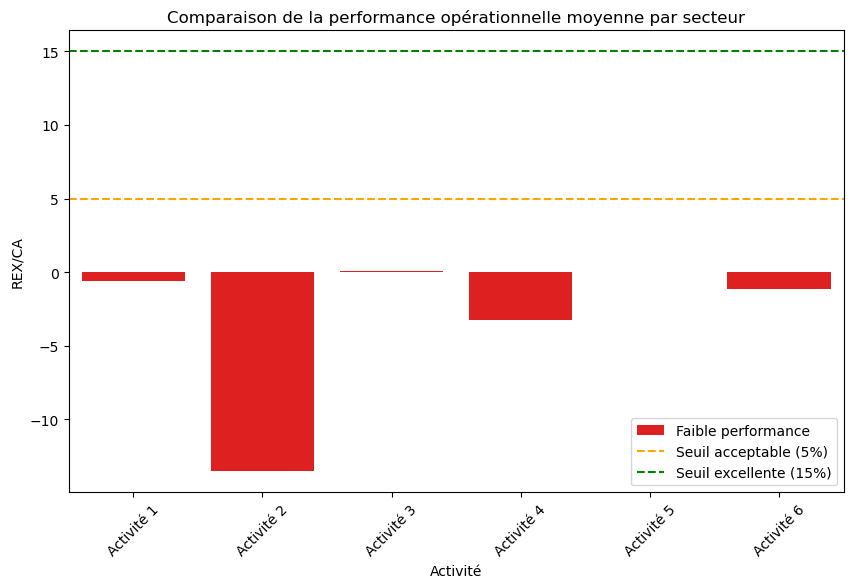

In [35]:
#Visualisation de la marge opérationnelle moyenne par secteur d'activité avec seaborn et matplotlib
re(figsize=(10,6))
sns.barplot(data=moyenne_activité, x="Activité", y="REX/CA", hue="Categorie", dodge=False,
            palette={"Faible performance": "red",
                     "Performance acceptable": "orange",
                     "Excellente performance": "green",
                     "Inconnu": "gray"})

plt.axhline(5, color="orange", linestyle="--", label="Seuil acceptable (5%)")
plt.axhline(15, color="green", linestyle="--", label="Seuil excellente (15%)")
plt.xticks(rotation=45)
plt.title("Comparaison de la performance opérationnelle moyenne par activité")
plt.legend()
plt.show()


In [ ]:
## Interprétation
La comparaison sectorielle montre que l ensemble des  entreprises repartis dans 6 secteurs d activités présentent une rentabilité moyenne faible et d autres des marges déficitaires
malgré un CA. L activité 2 et 4 en difficulté affichent une rentabilité en dessus de la moyenne très faibles et déficitaires, ce qui peut s expliquer par des charges d explotations
très élevées.


In [ ]:
#10 Analyse et classification des entreprises par l'appréciation de ratio des immobilisation corporelle
#Etape 1: Définition des seuils de classification

< 30% → Faible intensité capitalistique (services, consulting, banques, etc.)

30% – 60% → Intensité normale (industrie moyenne, manufacturiers standards)

> 60% → Forte intensité capitalistique (construction, fabrication lourde, énergie, etc.)

In [41]:
#Fonction de classification
def classer_intensite_capitalistique(val):
    if pd.isna(val):
        return "Inconnu"
    elif val < 30:
        return "Faible intensité capitalistique"
    elif val <= 60:
        return "Intensité capitalistique normale"
    else:
        return "Forte intensité capitalistique"

# Application au DataFrame
df["Categorie_Intensite"] = df["Ratio des immobilisations corporelles"].apply(classer_intensite_capitalistique)


In [43]:
#Résultats de 15 entreprise classé selon leur secteur et leur ratio d'immobilisation corporelles
print(df[["Nom", "Activité", "Ratio des immobilisations corporelles", "Categorie_Intensite"]].head(15))

                      Nom    Activité  Ratio des immobilisations corporelles  \
0   STE ID 09900223186066  Activité 5                                 0.0055   
1   STE ID 09900223186066  Activité 5                                 0.0222   
2   STE ID 09900223186066  Activité 5                                 0.0050   
3   STE ID 09900223186066  Activité 5                                 0.0052   
4   STE ID 09900223186066  Activité 5                                 0.0059   
5   STE ID 09900223387037  Activité 5                                 0.0353   
6   STE ID 09900223387037  Activité 5                                 0.0349   
7   STE ID 09900223387037  Activité 5                                 0.0427   
8   STE ID 09900223387037  Activité 5                                 0.0385   
9   STE ID 09900223387037  Activité 5                                 0.0304   
10  STE ID 09900224182052  Activité 5                                 0.0633   
11  STE ID 09900224182052  Activité 5   

In [ ]:
#### Interprétation
La majorité des entreprises ont une intensité capitalistique comprise entre 20% et 30%, ce qui correspond à un profil d’activités orientées services,
moins dépendantes des immobilisations physiques.

#Remarque: l'analyse précédente basée sur le ratio de des immos corporelles a pris en considéation les données de ratio dans le Dataframe comme des valeurs en pourcentage pour comparer avec les seuils définis.  

In [ ]:
#11 Analyse avancée de la gestion du besoin en fonds de roulement (BFR) avec les ratios disponibles :

DSO (Days Sales Outstanding = délai moyen de règlement clients)

DPO (Days Payable Outstanding = délai moyen de règlement fournisseurs)

CCC (Cash Conversion Cycle = cycle de conversion de trésorerie)

In [14]:
import pandas as pd

#Etape1 Fonction de classification DSO
def classer_dso(val):
    if pd.isna(val):
        return "Inconnu"
    elif val < 30:
        return "Excellent recouvrement"
    elif 30 <= val <= 60:
        return "Acceptable"
    else:
        return "Risque (clients paient tard)"

In [18]:
#Etape2 Fonction de classification DPO
def classer_dpo(val):
    if pd.isna(val):
        return "Inconnu"
    elif val < 30:
        return "Faible délai fournisseurs"
    elif 30 <= val <= 60:
        return "Normal"
    else:
        return "Long délai fournisseurs"

#Etape3 Application au DataFrame
df["Classe_DSO"] = df["Délai moyen de règlement des clients"].apply(classer_dso)
df["Classe_DPO"] = df["Délai moyen de règlement des fournisseurs"].apply(classer_dpo)

#Etape4 Calcul du Cycle de Conversion de Trésorerie (CCC)
df["CCC"] = df["Délai moyen de règlement des clients"] - df["Délai moyen de règlement des fournisseurs"]

# Etape5 Classification par CCC
def classer_ccc(val):
    if pd.isna(val):
        return "Inconnu"
    elif val < 0:
        return "Cycle trésorerie efficace"
    elif 0 <= val <= 30:
        return "Cycle acceptable"
    else:
        return "Cycle long, immobilisation élevée"

df["Classe_CCC"] = df["CCC"].apply(classer_ccc)


In [16]:
# Aperçu des 50 premières entreprises classée par les critères des DSO, DPO et CCC
df[["Nom", "Classe_DSO", "Classe_DPO", "CCC", "Classe_CCC"]].head(50)


,Nom,Classe_DSO,Classe_DPO,CCC,Classe_CCC
0,STE ID 09900223186066,Risque (clients paient tard),Long délai fournisseurs,56,"Cycle long, immobilisation élevée"
1,STE ID 09900223186066,Risque (clients paient tard),Faible délai fournisseurs,69,"Cycle long, immobilisation élevée"
2,STE ID 09900223186066,Risque (clients paient tard),Normal,108,"Cycle long, immobilisation élevée"
3,STE ID 09900223186066,Risque (clients paient tard),Normal,86,"Cycle long, immobilisation élevée"
4,STE ID 09900223186066,Risque (clients paient tard),Normal,58,"Cycle long, immobilisation élevée"
5,STE ID 09900223387037,Risque (clients paient tard),Long délai fournisseurs,70,"Cycle long, immobilisation élevée"
6,STE ID 09900223387037,Risque (clients paient tard),Long délai fournisseurs,69,"Cycle long, immobilisation élevée"
7,STE ID 09900223387037,Risque (clients paient tard),Long délai fournisseurs,91,"Cycle long, immobilisation élevée"
8,STE ID 09900223387037,Risque (clients paient tard),Long délai fournisseurs,78,"Cycle long, immobilisation élevée"
9,STE ID 09900223387037,Risque (clients paient tard),Long délai fournisseurs,32,"Cycle long, immobilisation élevée"


In [ ]:
#Délai moyen de reglèment des clients définis:
*<30 jours: Recouvrement rapide, bonne gestion des créances
*30-60 jours: Recouvrement moyen, généralement acceptable.
*>60 jours: Recouvrement lent lent, peut indiquer des clients en difficulté.

#Déali moyen de reglèment fournisseurs:
*<30 jours: Paiement rapide peut indiquer une faible du crédit fournisseur
*30-60 jours: Délai de paiement acceptable
*>30 jours: paiement lent peut indiquer des difficultés financières

#Interpretation: l'analyse du BFR par les ratios de durée de crédit clients et le ratio de durée de crédit fournisseurs
nous a permis d identifier et de classer un echantillons de 40 entreprises selon leur cycle de conversion de trésorerie. 